In [1]:
from PIL import Image

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [5]:
import cv2

In [6]:
image = Image.open('sample_drawing.png')

In [7]:
image_arr = np.array(image)

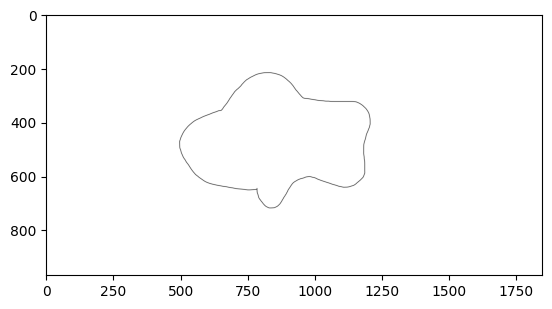

In [8]:
plt.imshow(image_arr)

In [9]:
start_x = 800
start_y = 500

In [10]:
img_copy = image_arr[:, :, :3].copy().astype('int32')

In [11]:
cv2.floodFill(img_copy, None, (start_x, start_y), [128, 128, 128])

(222118,
 array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255,

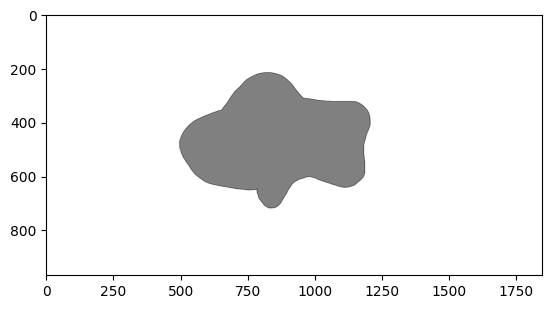

In [12]:
plt.imshow(img_copy)

In [13]:
filled_img = img_copy

In [14]:
print(filled_img.shape)

(968, 1846, 3)


In [15]:
area = 0
for i in range(filled_img.shape[0]):
    for j in range(filled_img.shape[1]):
        if filled_img[i, j, 0] == 128 and filled_img[i, j, 1] == 128 and filled_img[i, j, 2] == 128:
            area += 1

In [16]:
def is_filled(loc, filled_img):
    color = filled_img[loc[0], loc[1], :]
    for i in range(3):
        if color[i] != 128:
            return False
    return True

mask = np.zeros((filled_img.shape[0], filled_img.shape[1]))
perimeter = 0
for i in range(filled_img.shape[0]):
    curr_filled = False
    for j in range(filled_img.shape[1]):
        if is_filled([i, j], filled_img):
            if not curr_filled:
                mask[i, j] = 1
            curr_filled = True
        else:
            if curr_filled:
                mask[i, j] = 1
            curr_filled = False

for i in range(filled_img.shape[1]):
    curr_filled = False
    for j in range(filled_img.shape[0]):
        if is_filled([j, i], filled_img):
            if not curr_filled:
                mask[j, i] = 1
            curr_filled = True
        else:
            if curr_filled:
                mask[j, i] = 1
            curr_filled = False





        # adj_to_unfill = False
        # for r in [-1, 0, 1]:
        #     for c in [-1, 0, 1]:
        #         loc = [i + r, j + c]
        #         if i + r >= filled_img.shape[0] or i + r < 0 or j + c >= filled_img.shape[1] or i + c < 0:
        #             continue
        #         if not is_filled(loc, filled_img):
        #             adj_to_unfill = True
        
        # if is_filled([i, j], filled_img) and adj_to_unfill:
        #     perimeter += 1


In [17]:
perimeter = mask.sum()

In [18]:
import math

In [19]:
print(4 * math.pi * area / (perimeter * perimeter))

0.5852311758536354


In [20]:
print(perimeter)

2184.0


In [21]:
print(tot / (filled_img.shape[0] * filled_img.shape[1]))

NameError: name 'tot' is not defined

In [22]:
img_arr_copy = filled_img.copy()

In [ ]:
print(img_arr_copy.shape)

(968, 1846, 3)


(968, 1846)


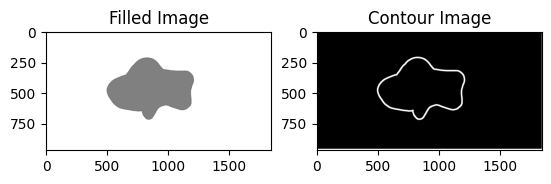

In [34]:
# Convert the filled image to grayscale
gray_image = cv2.cvtColor(np.float32(img_arr_copy), cv2.COLOR_BGR2GRAY)
print(gray_image.shape)
gray_image = gray_image[2:-2, 2:-2]
gray_image = cv2.convertScaleAbs(gray_image)
# Find contours in the grayscale image
contours, _ = cv2.findContours(gray_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a black background
contour_image = np.zeros_like(img_arr_copy)
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), thickness=10)

# Display the original filled image and the contour image using matplotlib
plt.subplot(1, 2, 1)
plt.imshow(img_arr_copy)
plt.title('Filled Image')

plt.subplot(1, 2, 2)
plt.imshow(contour_image)
plt.title('Contour Image')

plt.show()


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


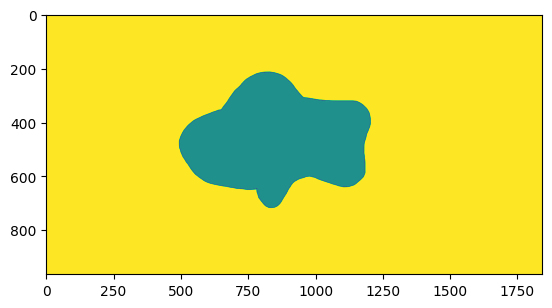

In [36]:
plt.imshow(gray_image)
print(gray_image)

In [27]:
contours2 = contours[1:]
p = 0
for i in range(len(contours2)):
    a = cv2.arcLength(contours2[i], closed=False)
    print(a)
    p += a

30.242640614509583
16.242640614509583
6.2426406145095825
6.2426406145095825
6.2426406145095825
22.727921843528748
11.485281229019165
7.656854152679443
4.2426406145095825
4.2426406145095825
7.656854152679443
4.2426406145095825
4.2426406145095825
4.2426406145095825
16.55634903907776
4.2426406145095825
4.2426406145095825
4.2426406145095825
4.2426406145095825
4.2426406145095825
4.2426406145095825
4.2426406145095825
6.656854152679443
9.485281229019165
7.656854152679443
4.2426406145095825
4.2426406145095825
15.142135381698608
12.485281229019165
4.2426406145095825
6.656854152679443
6.656854152679443
4.2426406145095825
6.656854152679443
4.2426406145095825
6.656854152679443
12.313708066940308
9.485281229019165
6.656854152679443
17.313708305358887
4.2426406145095825
8.656854152679443
7.656854152679443
7.656854152679443
6.656854152679443
6.656854152679443
4.2426406145095825
8.656854152679443
7.656854152679443
7.656854152679443
6.656854152679443
6.656854152679443
6.656854152679443
6.65685415267944

In [26]:
cv2.arcLength(contours[0], closed=True)

5608.0

In [28]:
print(p)

4697.65752184391


In [99]:
print(len(contours))

522


In [95]:
print(gray_image.shape)

(964, 1842)


In [37]:
print(contours)

(array([[[   0,    0]],

       [[   0,  963]],

       [[1841,  963]],

       [[1841,    0]]], dtype=int32), array([[[827, 717]],

       [[828, 716]],

       [[841, 716]],

       [[842, 717]],

       [[841, 718]],

       [[828, 718]]], dtype=int32), array([[[841, 716]],

       [[842, 715]],

       [[848, 715]],

       [[849, 716]],

       [[848, 717]],

       [[842, 717]]], dtype=int32), array([[[848, 715]],

       [[849, 714]],

       [[850, 714]],

       [[851, 715]],

       [[850, 716]],

       [[849, 716]]], dtype=int32), array([[[850, 714]],

       [[851, 713]],

       [[852, 713]],

       [[853, 714]],

       [[852, 715]],

       [[851, 715]]], dtype=int32), array([[[852, 713]],

       [[853, 712]],

       [[854, 712]],

       [[855, 713]],

       [[854, 714]],

       [[853, 714]]], dtype=int32), array([[[818, 713]],

       [[819, 712]],

       [[821, 712]],

       [[822, 713]],

       [[823, 713]],

       [[824, 714]],

       [[825, 714]],

     

In [44]:
new_contour = []
for i in range(1, len(contours)):
    for j in contours[i]:
        new_contour.append(j)

In [50]:
print(contours[0].shape)

(4, 1, 2)


In [48]:
print(np.array(new_contour).shape)

(2993, 1, 2)


In [58]:
p = 0
for i in range(1, len(contours)):
    p += (cv2.arcLength(contours[i], closed=False))
print(p)

4697.65752184391


In [53]:
new_contour = np.array(new_contour)

In [60]:
rect = cv2.minAreaRect(new_contour)

In [61]:
box = cv2.boxPoints(rect)

In [63]:
box = np.int0(box)

In [64]:
rotated_box_image = filled_img.copy()
cv2.drawContours(rotated_box_image, [box], 0, (0, 255, 0), 2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

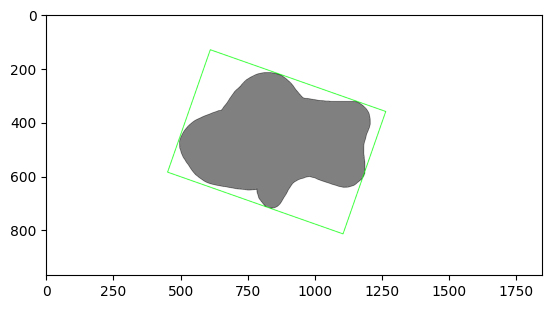

In [65]:
plt.imshow(rotated_box_image)

In [68]:
center, radius = cv2.minEnclosingCircle(new_contour)

In [72]:
center = [int(center[0]), int(center[1])]
radius = int(radius)

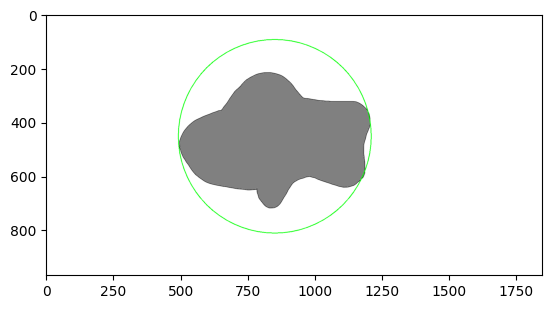

In [73]:
bounding_circle_image = filled_img.copy()
cv2.circle(bounding_circle_image, center, radius, (0, 255, 0), 2)
plt.imshow(bounding_circle_image)

In [74]:
convex_hull = cv2.convexHull(new_contour)

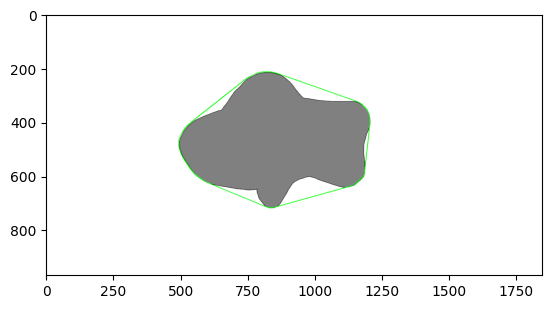

In [77]:
convex_hull_image = filled_img.copy()
cv2.drawContours(convex_hull_image, [convex_hull], 0, (0, 255, 0), 2)
plt.imshow(convex_hull_image)

In [78]:
hull_area = cv2.contourArea(convex_hull)

In [81]:
print(hull_area)
print(area/hull_area)

256346.0
0.8665553587729085
